In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [83]:
# Read the excel file
df = pd.read_csv('./data/IMF_Italy_US.csv')

# explore the data
print(df.head())

         date  industrial_production_index  \
0  1960-01-01                    31.134278   
1  1960-02-01                    32.602650   
2  1960-03-01                    33.712883   
3  1960-04-01                    33.891953   
4  1960-05-01                    34.632109   

   industrial_production_1m_growth_rate  \
0                                   NaN   
1                              4.716258   
2                              3.405346   
3                              0.531161   
4                              2.183868   

   industrial_production_12m_growth_rate  nominal_er_nat_currency_per_usd  \
0                                    NaN                       621.118012   
1                                    NaN                       621.118012   
2                                    NaN                       620.600000   
3                                    NaN                       625.000001   
4                                    NaN                       625.000001   

 

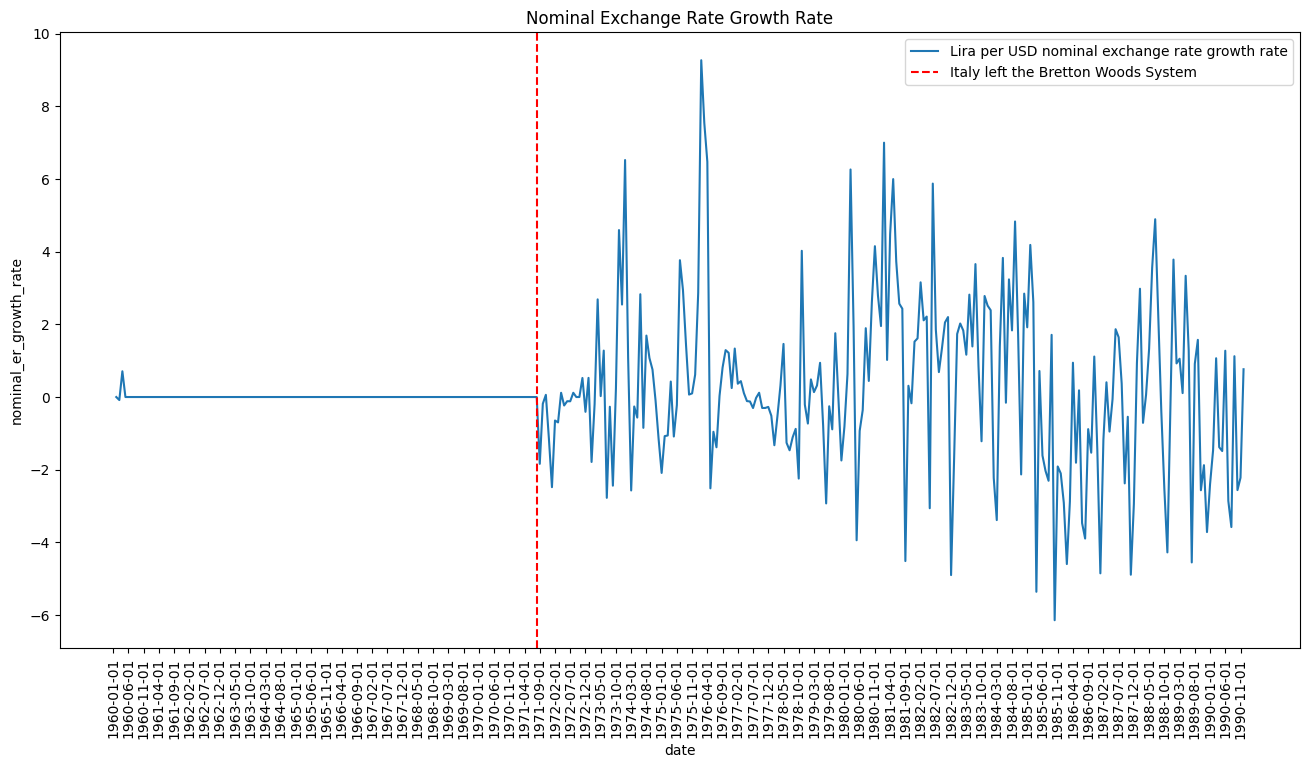

In [84]:
# Plot a time series graph of the monthly growth in nominal exchange rates of your country, versus the US dollar.
plt.plot(df['date'],df['nominal_er_growth_rate'], label='Lira per USD nominal exchange rate growth rate')
plt.xlabel('date')
plt.ylabel('nominal_er_growth_rate')
plt.title('Nominal Exchange Rate Growth Rate')
# change the x-axis to be more readable
plt.xticks(np.arange(0, len(df['date']), 5), rotation=90)
# make the graph bigger so that the x-axis is more readable
plt.gcf().set_size_inches(16, 8)
# draw vertical line at the end of the Bretton Woods System and show the label
plt.axvline(x=139, color='r', linestyle='--', label='Italy left the Bretton Woods System')
plt.legend()
# save the graph
plt.savefig('./images/nominal_er_growth_rate.png')

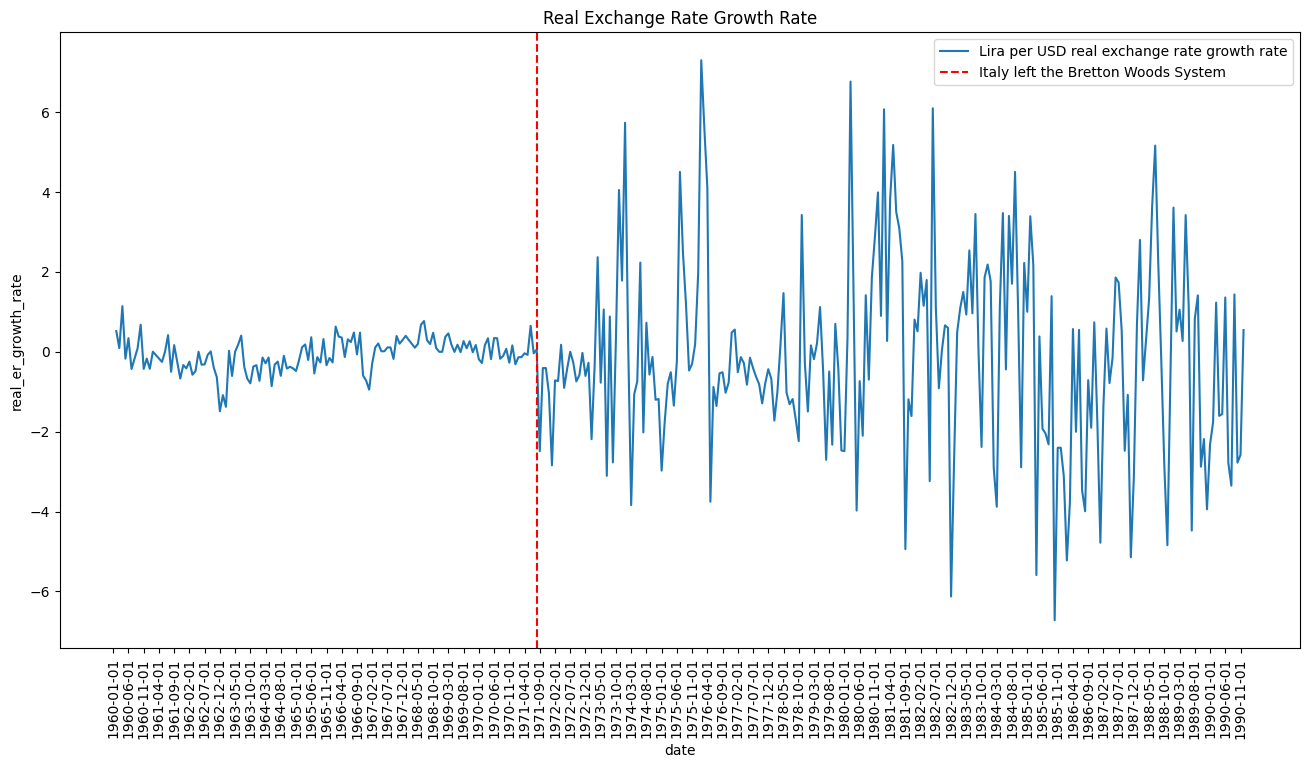

In [85]:
# Plot a time series graph of the monthly growth in real exchange rates of your country, versus the US dollar.
plt.plot(df['date'],df['real_er_growth_rate'], label='Lira per USD real exchange rate growth rate')
plt.xlabel('date')
plt.ylabel('real_er_growth_rate')
plt.title('Real Exchange Rate Growth Rate')
# change the x-axis to be more readable
plt.xticks(np.arange(0, len(df['date']), 5), rotation=90)
# make the graph bigger so that the x-axis is more readable
plt.gcf().set_size_inches(16, 8)
# draw vertical line at the end of the Bretton Woods System
plt.axvline(x=139, color='r', linestyle='--', label='Italy left the Bretton Woods System')
plt.legend()
# save the graph
plt.savefig('./images/real_er_growth_rate.png')

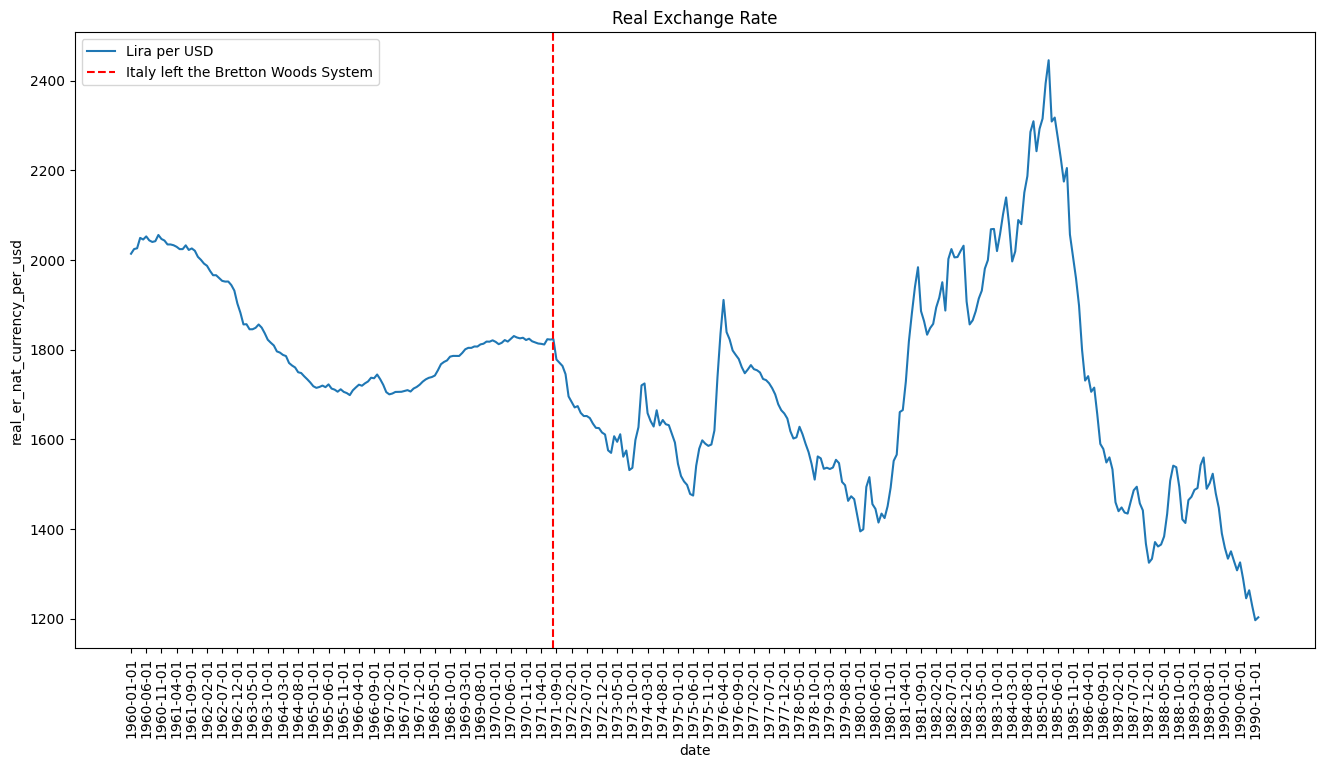

In [86]:
# Plot a time series graph of the real exchange rate level of your country, versus the US dollar.
plt.plot(df['date'],df['real_er_nat_currency_per_usd'], label= 'Lira per USD')
plt.xlabel('date')
plt.ylabel('real_er_nat_currency_per_usd')
plt.title('Real Exchange Rate')
# change the x-axis to be more readable
plt.xticks(np.arange(0, len(df['date']), 5), rotation=90)
# make the graph bigger so that the x-axis is more readable
plt.gcf().set_size_inches(16, 8)
# draw vertical line at the end of the Bretton Woods System
plt.axvline(x=139, color='r', linestyle='--', label='Italy left the Bretton Woods System')
plt.legend()
plt.savefig('./images/real_er.png')

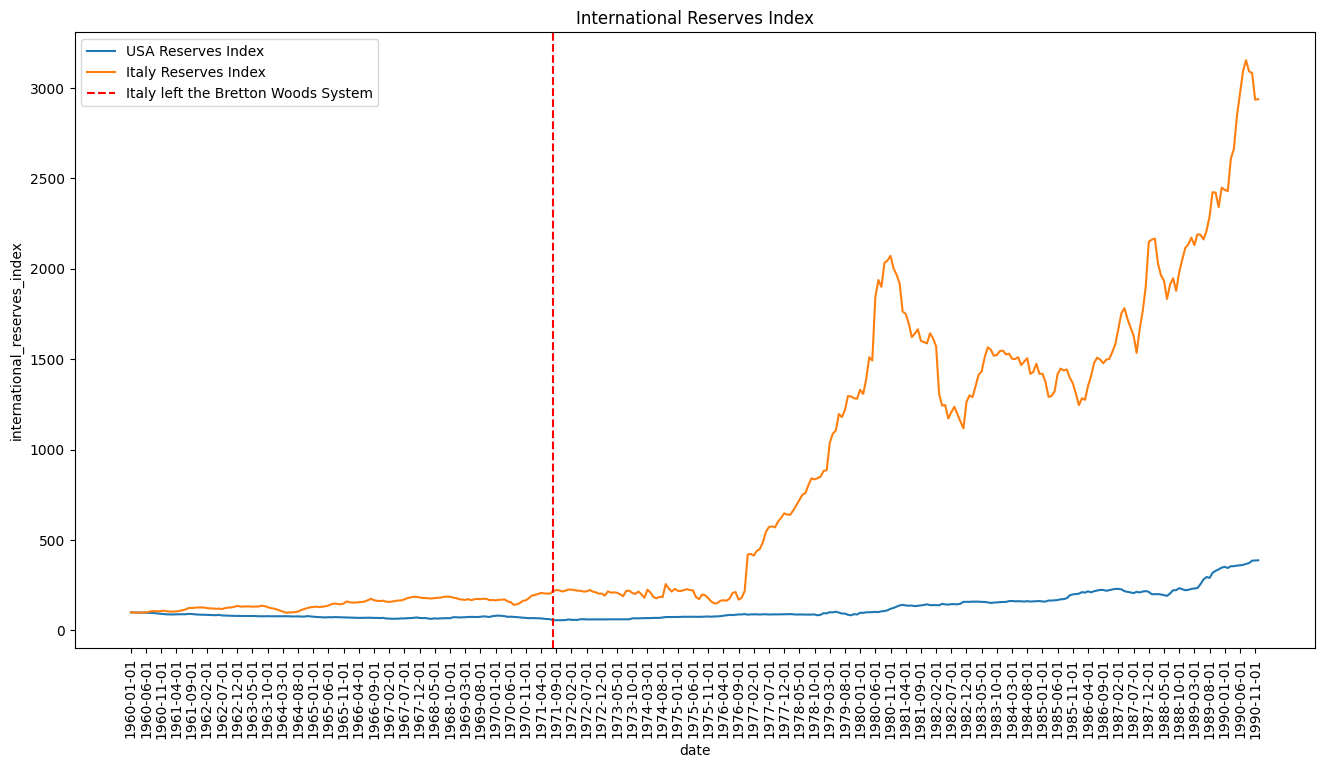

In [87]:
# Plot a time series graph of the monthly indexed value of international reserves of your country and the monthly indexed value of international reserves of the US from January 1960 until the exit of the US from Bretton Woods.
plt.plot(df['date'],df['reserves_index_usa'], label='USA Reserves Index')
plt.plot(df['date'],df['reserves_index_italy'], label='Italy Reserves Index')
plt.xlabel('date')
plt.ylabel('international_reserves_index') 
plt.title('International Reserves Index')
# change the x-axis to be more readable
plt.xticks(np.arange(0, len(df['date']), 5), rotation=90)
# make the graph bigger so that the x-axis is more readable
plt.gcf().set_size_inches(16, 8)
# draw vertical line at the end of the Bretton Woods System
plt.axvline(x=139, color='r', linestyle='--', label='Italy left the Bretton Woods System')
plt.legend()
plt.savefig('./images/international_reserves_index.png')